In [43]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pa

In [54]:
url="E:\ebooks CSE\datasets\iris.csv"

#assign column name as n
n=['sepal_length','sepal_width','petal_length','petal_width','class']

#read dataset to pandas dataframe
sd=pa.read_csv(url,names=n)

In [38]:
sd.head()

,sepal_length,sepal_width,petal_length,petal_width
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
x=sd.iloc[:,:-1]
y=sd.iloc[:,-1]

In [7]:
sd.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)
#after that calculate random state and run that again

In [125]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=13)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [126]:
y_pred=classifier.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9130434782608695


In [116]:
# To calculate the best random state
'''   from sklearn.neighbors import KNeighborsClassifier
ts_score=[]
for j in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=j)
    lr=KNeighborsClassifier().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
J=ts_score.index(np.max(ts_score))     '''

'   from sklearn.neighbors import KNeighborsClassifier\nts_score=[]\nfor j in range(100):\n    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=j)\n    lr=KNeighborsClassifier().fit(x_train,y_train)\n    ts_score.append(lr.score(x_test,y_test))\nJ=ts_score.index(np.max(ts_score))     '

In [128]:
J

1

In [122]:
# x_train

In [129]:
# To calculate the k value

error=[]
for i in range(3,100,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y_test=knn.predict(x_test)
    error.append(np.mean(pred_y_test!=y_test))

In [80]:
# error

Text(0, 0.5, 'Mean Error')

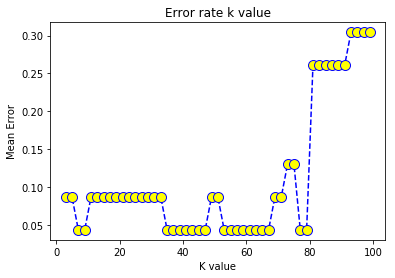

In [118]:
pt.plot(range(3,100,2),error,color='blue',linestyle='dashed',marker='o',markersize=10,markerfacecolor='yellow')
pt.title('Error rate k value')
pt.xlabel('K value')
pt.ylabel('Mean Error')

In [130]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6 0 0]
 [0 9 1]
 [0 1 6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.86      0.86      0.86         7

      micro avg       0.91      0.91      0.91        23
      macro avg       0.92      0.92      0.92        23
   weighted avg       0.91      0.91      0.91        23

